## Detecting Plastic content in Rivers

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:


!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Plastic

/content/drive/MyDrive/Plastic


In [ ]:
!ls

'AI Hackathon REVA University'	 data.yaml


In [ ]:
%cd /content/drive/MyDrive/Plastic

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=30 imgsz=640 plots=True

/content/drive/MyDrive/Plastic
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simp

In [ ]:
!ls runs/detect/train3/

args.yaml					     train_batch0.jpg
confusion_matrix.png				     train_batch100.jpg
events.out.tfevents.1688885530.5f16a54b0c1e.12023.0  train_batch101.jpg
F1_curve.png					     train_batch102.jpg
P_curve.png					     train_batch1.jpg
PR_curve.png					     train_batch2.jpg
R_curve.png					     val_batch0_labels.jpg
results.csv					     val_batch0_pred.jpg
results.png					     weights


## Graphs

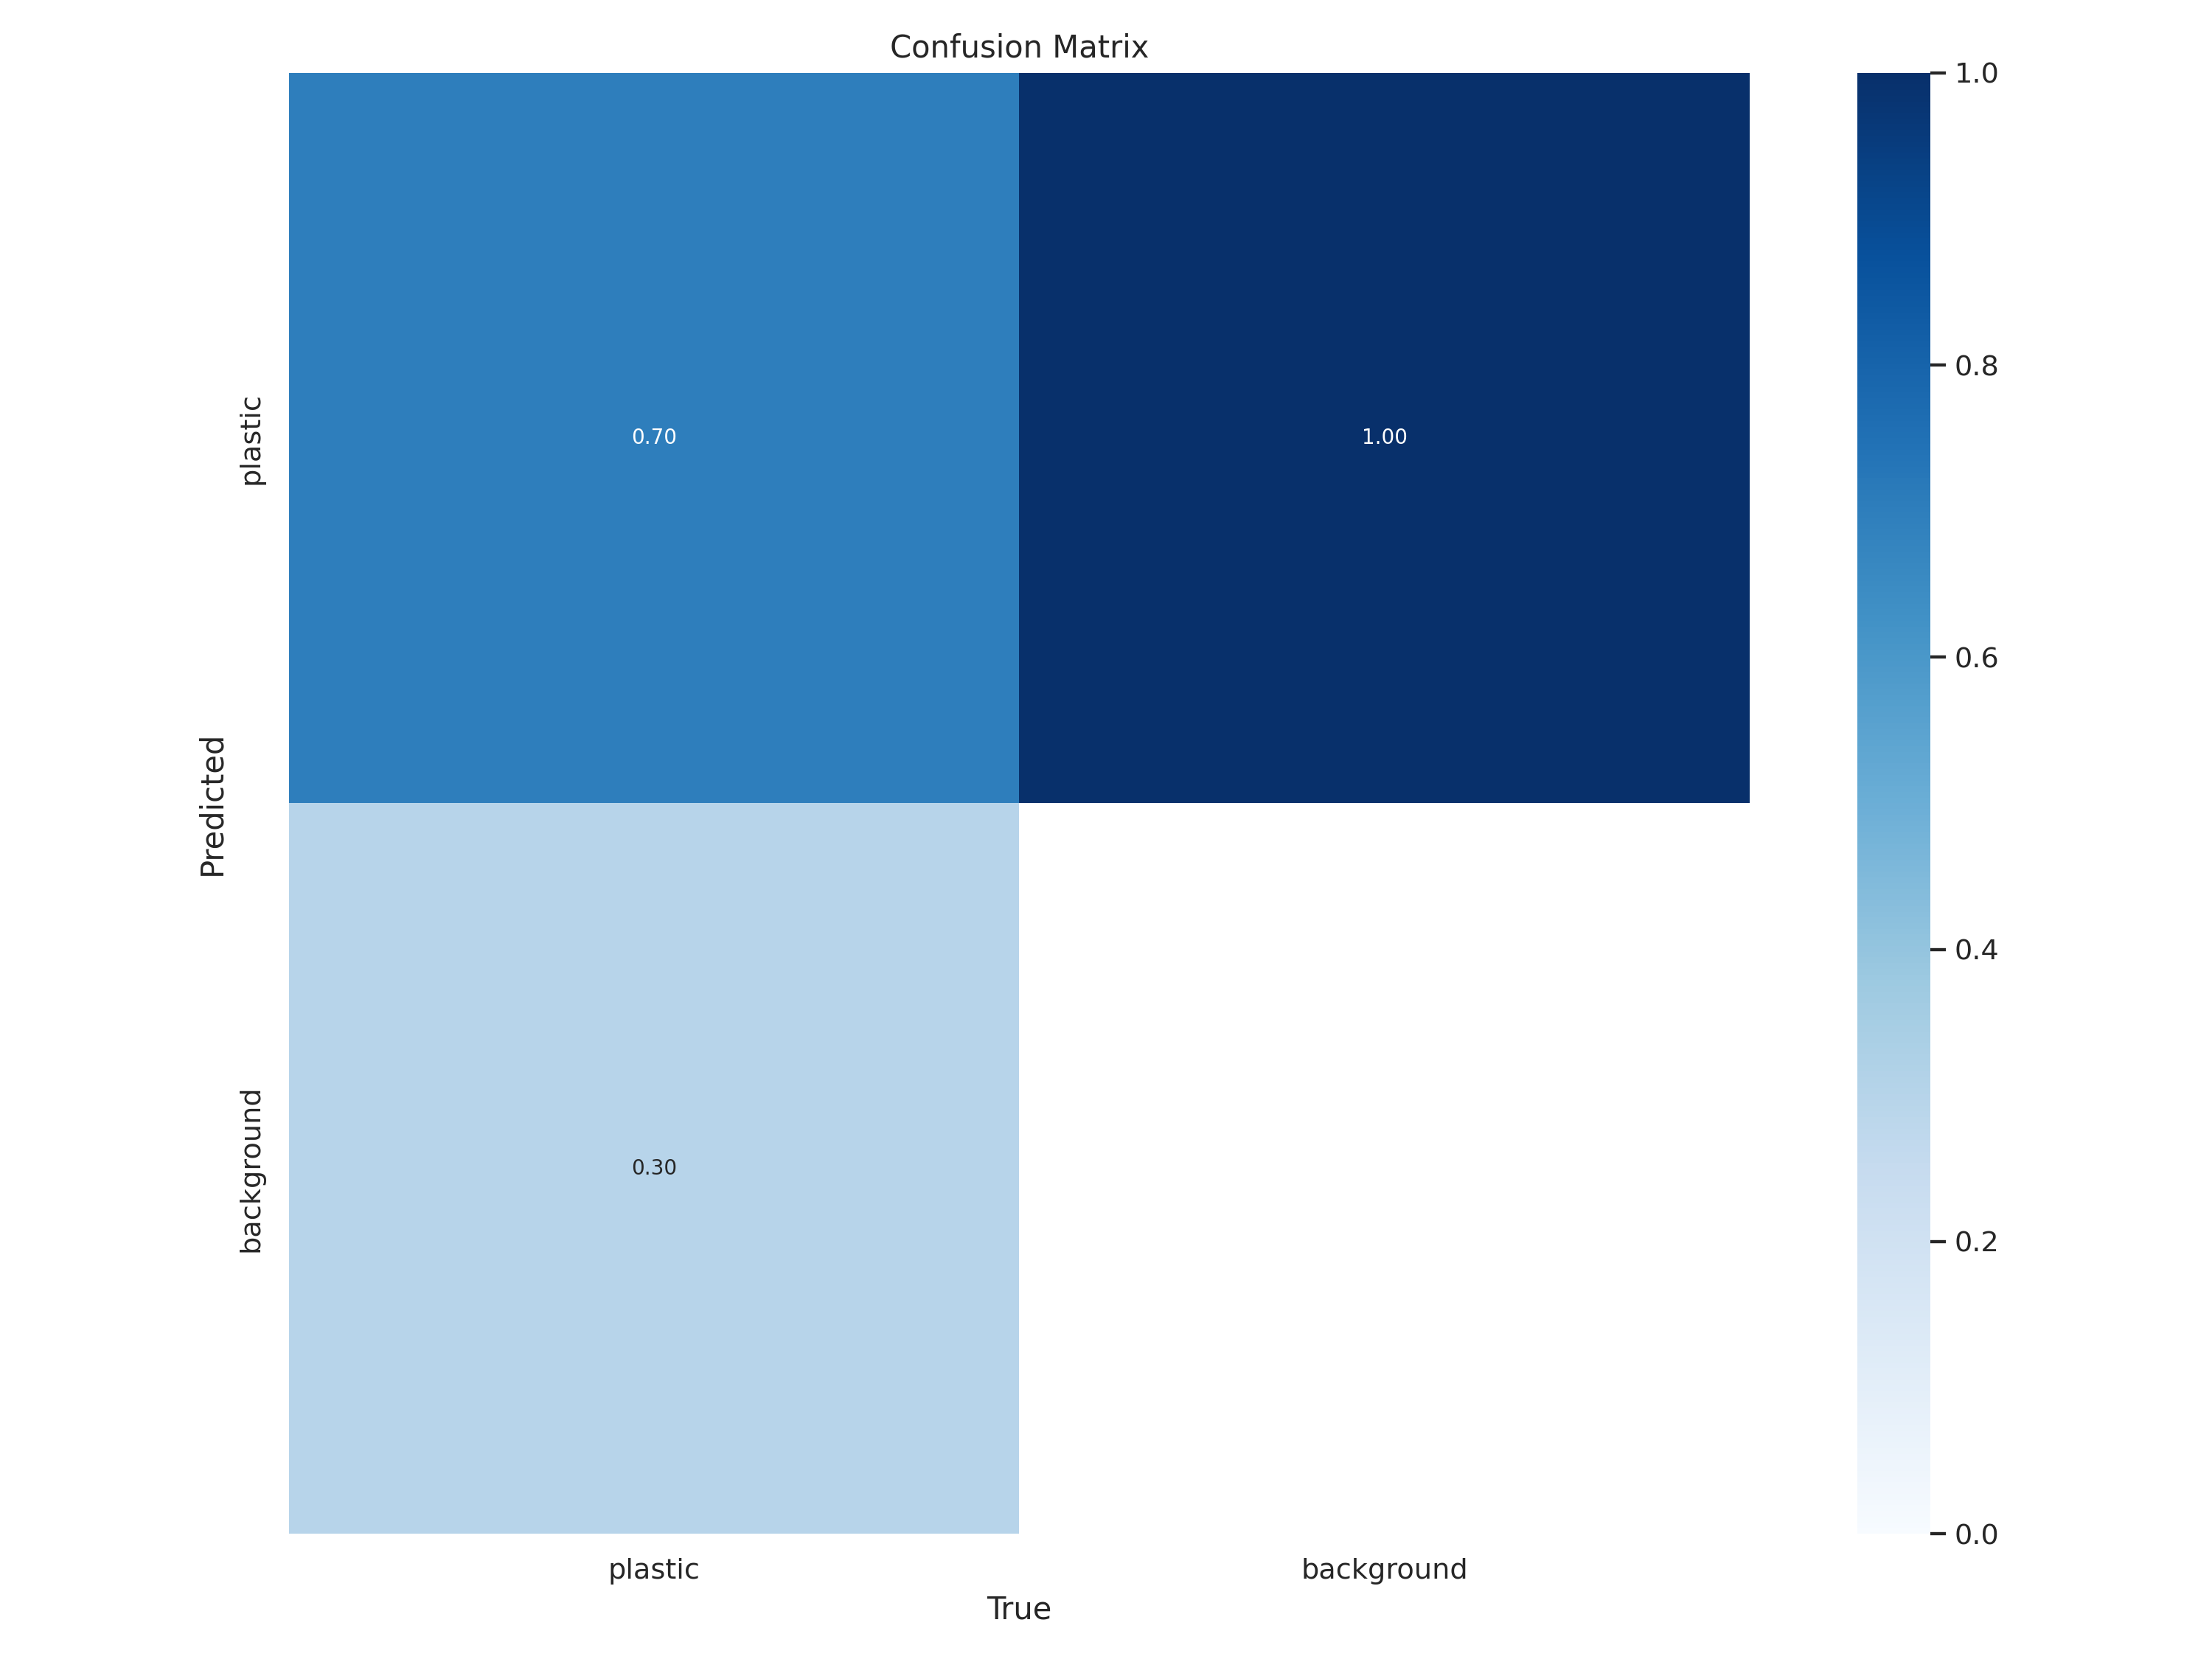

In [ ]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

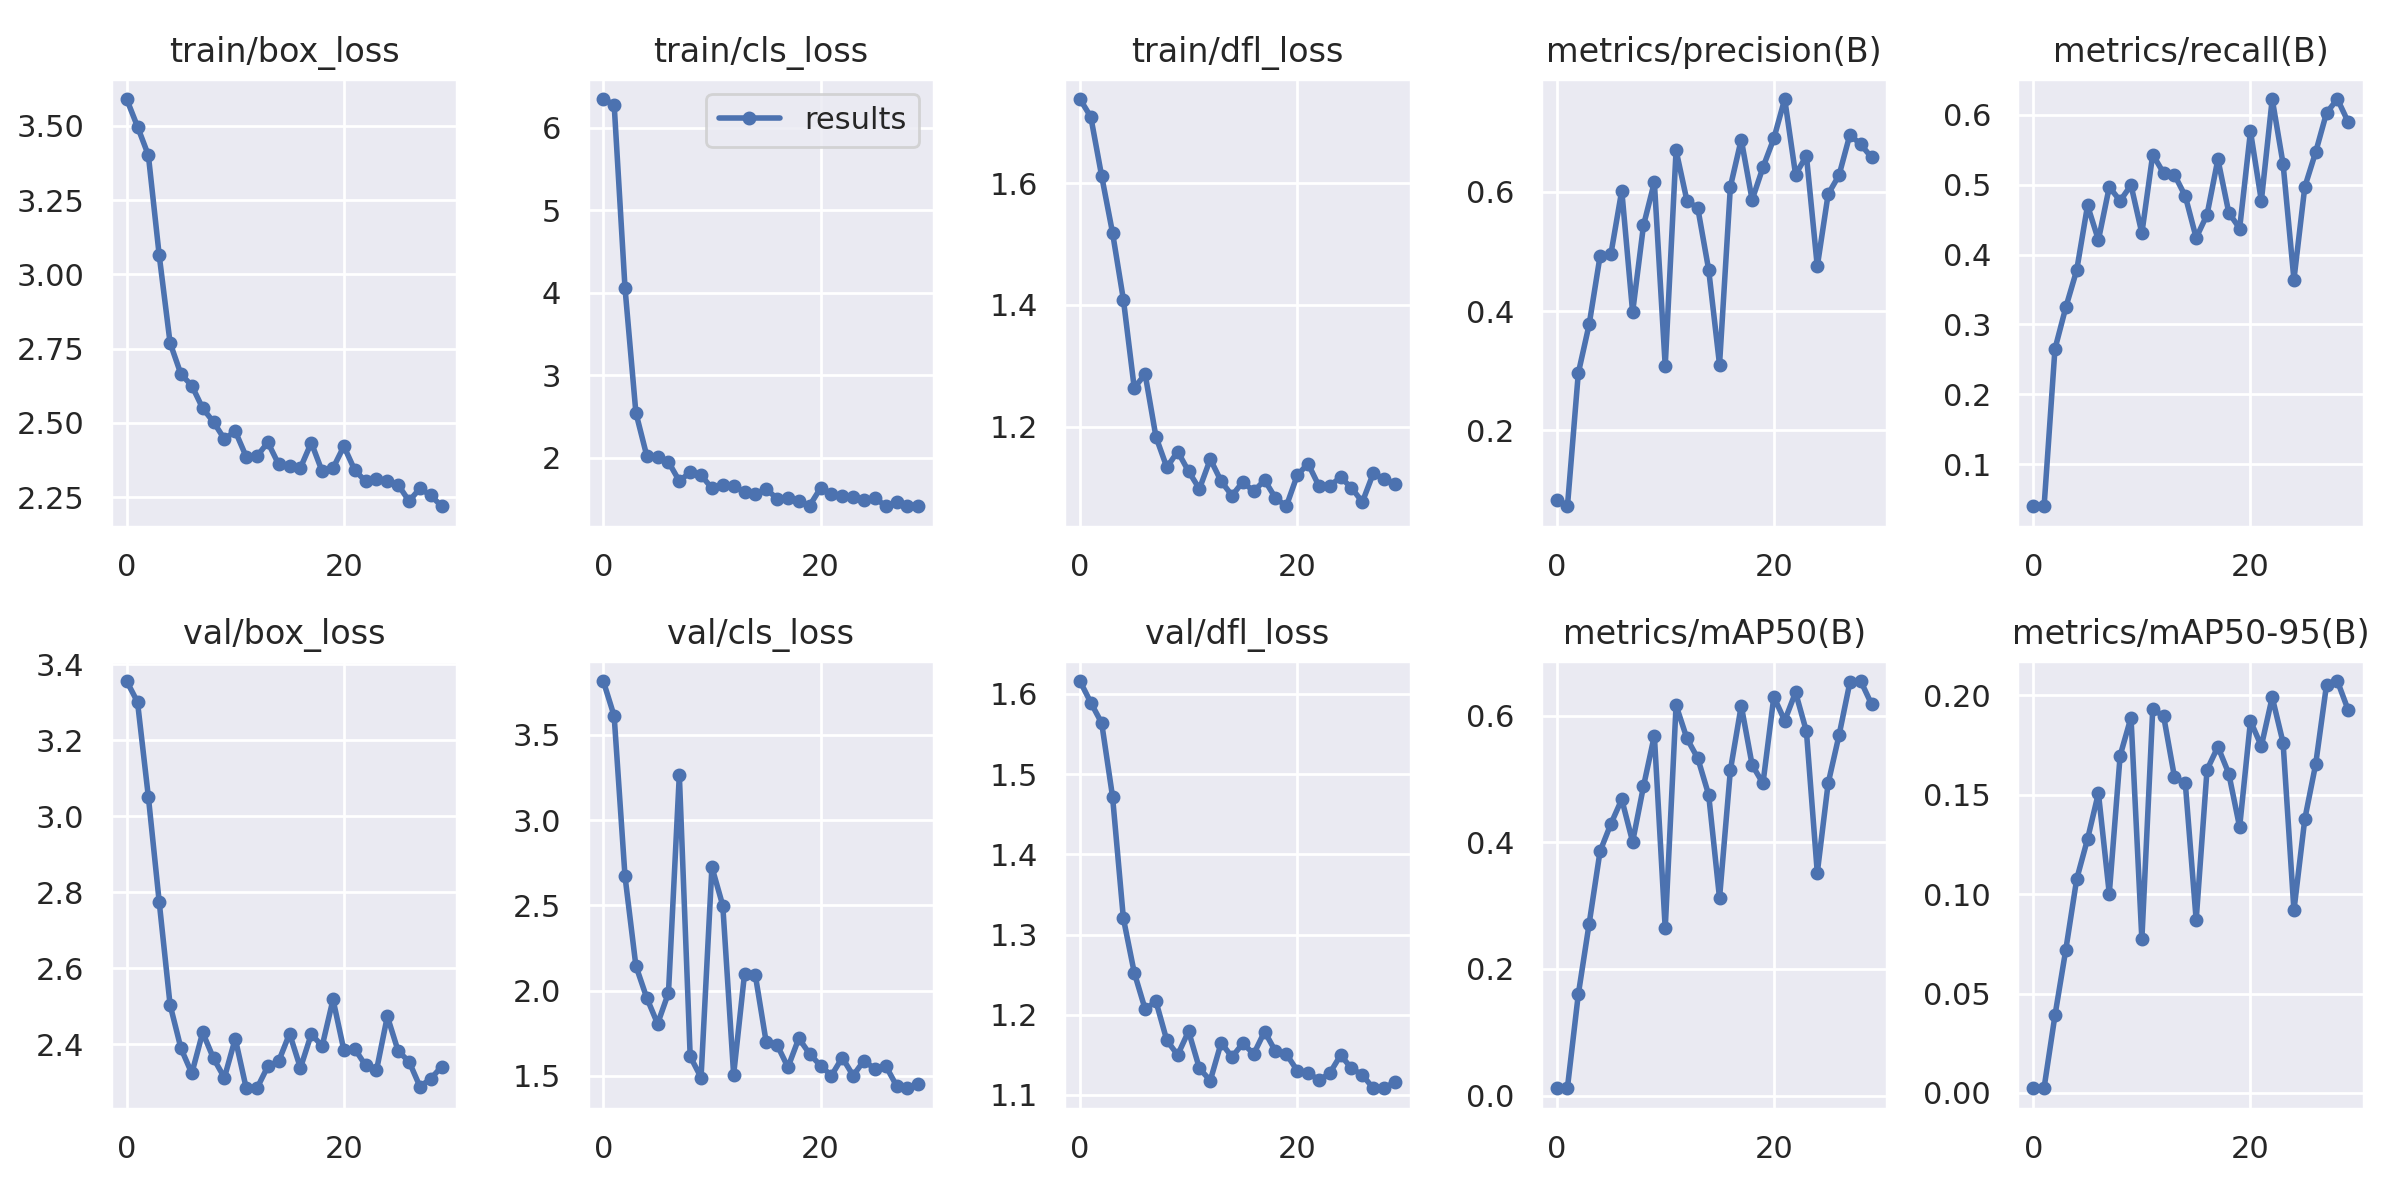

In [ ]:
Image(filename='runs/detect/train3/results.png', width=600)

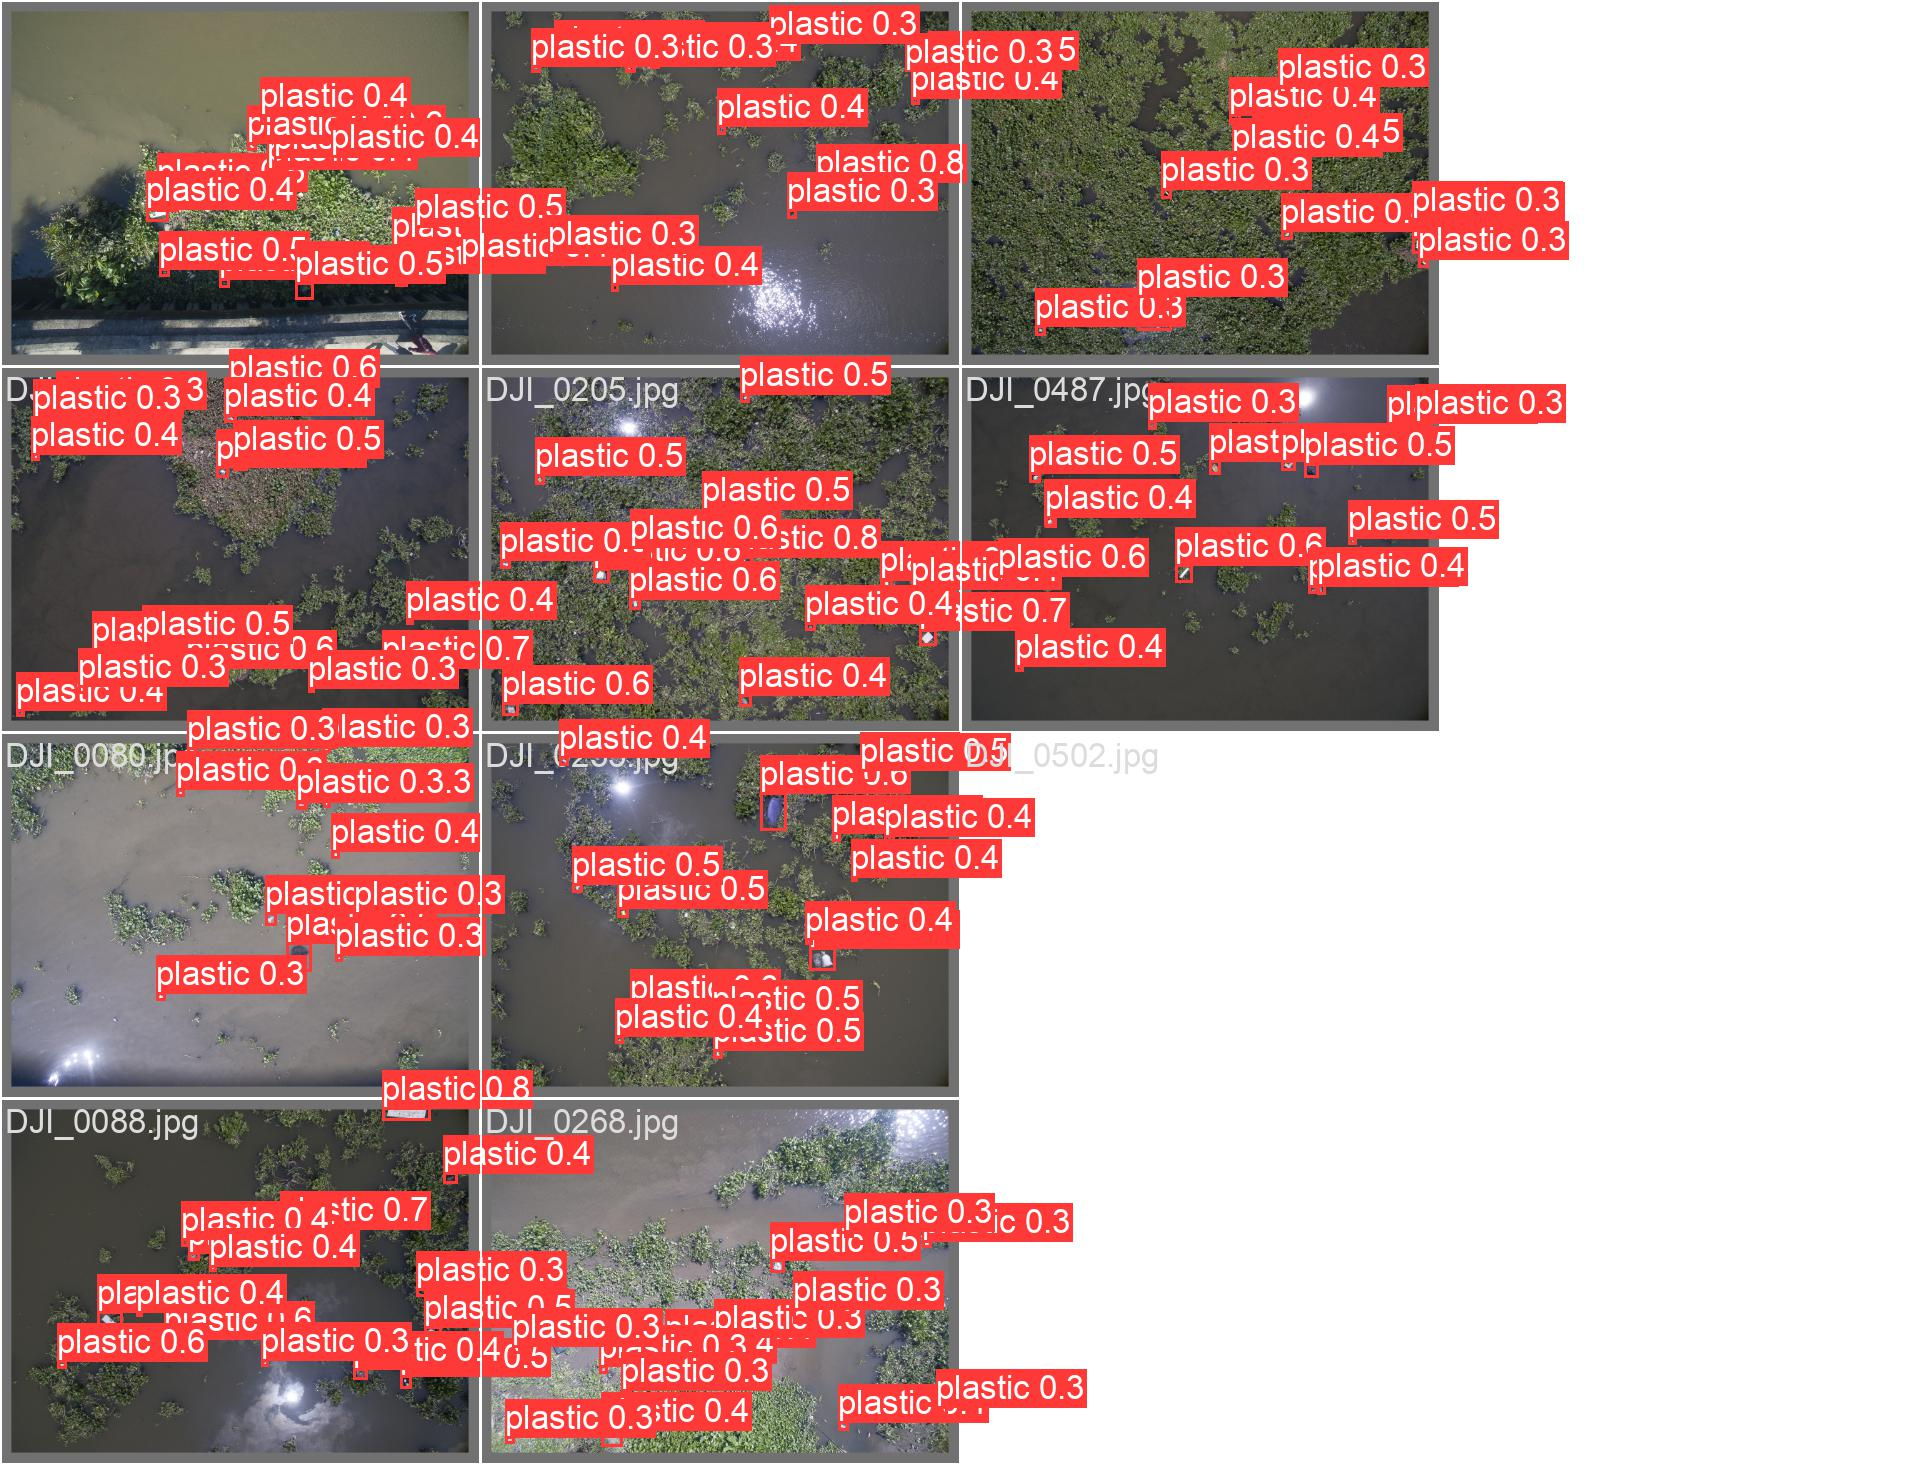

In [ ]:
Image(filename='runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validation

In [ ]:
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

2023-07-09 07:42:09.218737: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 07:42:10.124108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Plastic/AI Hackathon REVA University/Predict/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:06<00:00,  6.20s/it]
                   all         10        151      0.681      0.623      0.653      0.206
Speed: 0.2ms pre-pro

## Testing

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source="/content/drive/MyDrive/Plastic/AI Hackathon REVA University/Test/images" save=True > output.csv


2023-07-09 07:44:18.999870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 07:44:19.902980: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/30 /content/drive/MyDrive/Plastic/AI Hackathon REVA University/Test/images/DJI_0310.jpg: 480x640 18 plastics, 62.8ms
image 2/30 /content/drive/MyDrive/Plastic/AI Hackathon REVA University/Test/images/DJI_0314.jpg: 480x640 15 plastics, 13.1ms
image 3/30 /content/drive/MyDrive/Plastic/AI Hackathon REVA University/Test/images/DJI_0317.jpg: 480x640 16 plastics, 13.1ms
image 4/30 /content/d

## GEOLOCATION

In [ ]:
!pip install ExifRead

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 5.9 MB/s eta 0:00:00


In [40]:
from PIL import Image, ExifTags
from urllib.parse import quote
import os

def get_gps_info(exif_data):
    gps_info = {}
    for tag, value in exif_data.items():
        if tag in ExifTags.TAGS and ExifTags.TAGS[tag] == "GPSInfo":
            for t in value.keys():
                sub_tag = ExifTags.GPSTAGS.get(t, t)
                gps_info[sub_tag] = value[t]
    return gps_info

folder_path = "/content/drive/MyDrive/Plastic/AI Hackathon REVA University/Test/images"

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with Image.open(file_path) as img:
            exif_data = img._getexif()
            if exif_data is not None:
                gps_info = get_gps_info(exif_data)
                if "GPSLatitude" in gps_info and "GPSLongitude" in gps_info:
                    latitude = gps_info["GPSLatitude"]
                    longitude = gps_info["GPSLongitude"]

                    # Convert GPS coordinates to decimal format
                    latitude_decimal = float(latitude[0]) + float(latitude[1]) / 60 + float(latitude[2]) / 3600
                    longitude_decimal = float(longitude[0]) + float(longitude[1]) / 60 + float(longitude[2]) / 3600

                    # Generate the Google Maps URL using the latitude and longitude
                    google_maps_url = f"https://maps.google.com/maps?ll={latitude_decimal:.6f},{longitude_decimal:.6f}"

                    print("File:", filename)
                    print("Latitude:", latitude_decimal)
                    print("Longitude:", longitude_decimal)
                    print("Google Maps URL:", google_maps_url)
                    print("-----------------------------------")
                else:
                    print("File:", filename)
                    print("GPS latitude or longitude not found in metadata.")
                    print("-----------------------------------")
            else:
                print("File:", filename)
                print("No EXIF data found.")
                print("-----------------------------------")


File: DJI_0317.jpg
Latitude: 10.895935
Longitude: 106.694585
Google Maps URL: https://maps.google.com/maps?ll=10.895935,106.694585
-----------------------------------
File: DJI_0314.jpg
Latitude: 10.895943333333333
Longitude: 106.69439833333334
Google Maps URL: https://maps.google.com/maps?ll=10.895943,106.694398
-----------------------------------
File: DJI_0349.jpg
Latitude: 10.89579
Longitude: 106.69535666666667
Google Maps URL: https://maps.google.com/maps?ll=10.895790,106.695357
-----------------------------------
File: DJI_0310.jpg
Latitude: 10.895956666666667
Longitude: 106.69407
Google Maps URL: https://maps.google.com/maps?ll=10.895957,106.694070
-----------------------------------
File: DJI_0348.jpg
Latitude: 10.895901666666667
Longitude: 106.69530333333333
Google Maps URL: https://maps.google.com/maps?ll=10.895902,106.695303
-----------------------------------
File: DJI_0347.jpg
Latitude: 10.89586
Longitude: 106.69387
Google Maps URL: https://maps.google.com/maps?ll=10.89586